In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

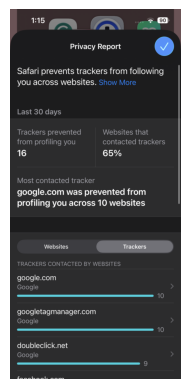

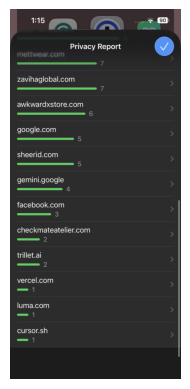

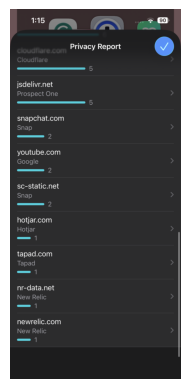

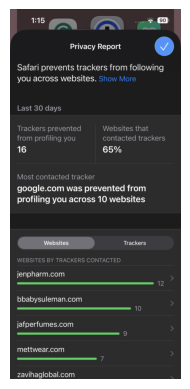

In [3]:
img1 = plt.imread('IMG_8926.png')
img2 = plt.imread('IMG_8925.png')
img3 = plt.imread('IMG_8928.png')
img4 = plt.imread('IMG_8924.png')

plt.imshow(img1)
plt.axis('off') 
plt.show()
plt.imshow(img2)
plt.axis('off') 
plt.show()
plt.imshow(img3)
plt.axis('off') 
plt.show()
plt.imshow(img4)
plt.axis('off')  
plt.show()

**Data Setup**

Making dictionaries of data to create a DataFrame for plotting.

In [2]:
# 1. Top Websites that contacted trackers (Name vs Count of Trackers/Requests)
website_data = {
    'Website': [
        'jenpharm.com', 'bbabysuleman.com', 'jafperfumes.com', 'mettwear.com', 
        'zavihaglobal.com', 'awkwardxstore.com', 'google.com', 'sheerid.com', 
        'gemini.google', 'facebook.com', 'checkmateatelier.com'
    ],
    'Tracker_Requests': [12, 10, 9, 7, 7, 6, 5, 5, 4, 3, 2]
}

# 2. Top Trackers Profiling You (Tracker Name vs Frequency)
tracker_data = {
    'Tracker': [
        'google.com', 'googletagmanager', 'doubleclick.net', 'facebook.com', 
        'facebook.net', 'googleadservices', 'google-analytics', 'cloudflare.com', 
        'jsdelivr.net', 'snapchat.com', 'youtube.com'
    ],
    'Frequency': [10, 10, 9, 7, 7, 6, 6, 5, 5, 2, 2],
    'Parent_Company': [
        'Google', 'Google', 'Google', 'Meta', 
        'Meta', 'Google', 'Google', 'Cloudflare', 
        'Prospect One', 'Snap', 'Google'
    ]
}

# 3. Overall Statistics (from IMG_8926)
stats = {
    'Category': ['Websites Contacting Trackers', 'Websites Free of Trackers'],
    'Percentage': [65, 35] # Based on "65% of websites contacted trackers"
}

# Create DataFrames
df_websites = pd.DataFrame(website_data)
df_trackers = pd.DataFrame(tracker_data)

print("--- PRIVACY REPORT DATA ---")
print("\nTop Websites Contacting Trackers:")
display(df_websites.head())
print("\nMost Frequent Trackers Encountered:")
display(df_trackers.head())

--- PRIVACY REPORT DATA ---

Top Websites Contacting Trackers:


,Website,Tracker_Requests
0,jenpharm.com,12
1,bbabysuleman.com,10
2,jafperfumes.com,9
3,mettwear.com,7
4,zavihaglobal.com,7



Most Frequent Trackers Encountered:


,Tracker,Frequency,Parent_Company
0,google.com,10,Google
1,googletagmanager,10,Google
2,doubleclick.net,9,Google
3,facebook.com,7,Meta
4,facebook.net,7,Meta


**Plotting/Visualization**

plotting different types of graphs using matplotlib.
line plot for tracker requests over days of the week.
bar chart for top trackers.
pie chart for privacy report.
histogram for distribution of tracker requests.
scatter plot for tracker requests vs. time spent on site.

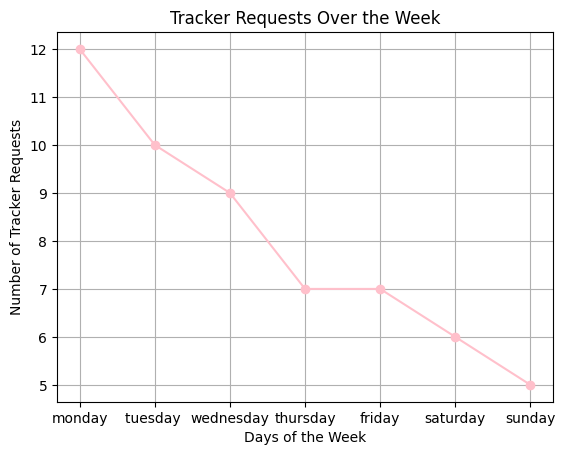

In [11]:
days=['monday' , 'tuesday ' , 'wednesday' , 'thursday' , 'friday' , 'saturday' , 'sunday' ]
x=days
y=df_websites['Tracker_Requests'][0:7]  # Assuming first 7 entries correspond to days of the week
plt.plot(x , y, marker='o', color='pink')
plt.grid(True)
plt.xlabel('Days of the Week')
plt.ylabel('Number of Tracker Requests')
plt.title('Tracker Requests Over the Week')
plt.show()

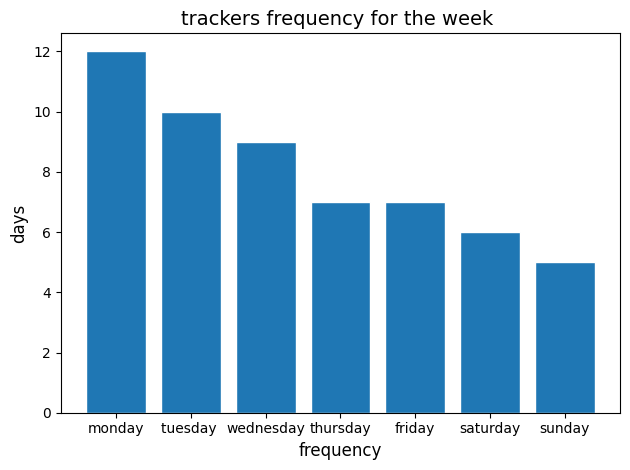

In [16]:

p1 = plt.bar(days, df_websites['Tracker_Requests'][0:7], color='#1f77b4', edgecolor='white', label='trackers requests')


plt.title('trackers frequency for the week ', fontsize=14)
plt.ylabel('days', fontsize=12)
plt.xlabel('frequency', fontsize=12)


#bar chart

plt.tight_layout()
plt.show()

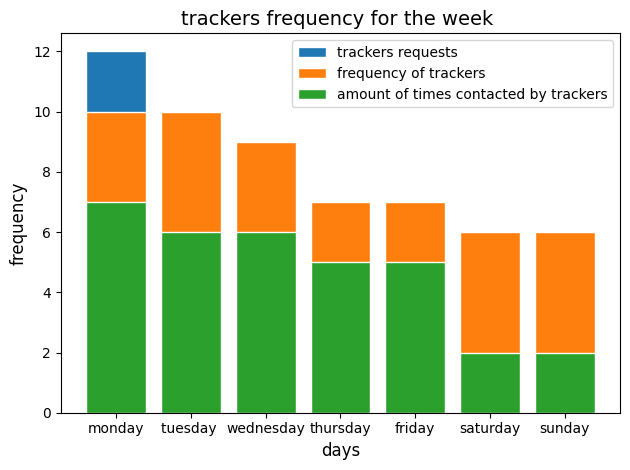

In [25]:


p1 = plt.bar(days, df_websites['Tracker_Requests'][0:7], color='#1f77b4', edgecolor='white', label='trackers requests')
p2 = plt.bar(days, df_trackers['Frequency'][0:7], color='#ff7f0e', edgecolor='white', label='frequency of trackers')
p3 = plt.bar(days, df_trackers['Frequency'][4:11], color='#2ca02c', edgecolor='white', label='amount of times contacted by trackers')

plt.title('trackers frequency for the week ', fontsize=14)
plt.ylabel('frequency', fontsize=12)
plt.xlabel('days', fontsize=12)


#stacked bar chart

plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.legend() # Add legend to differentiate bars
plt.show()

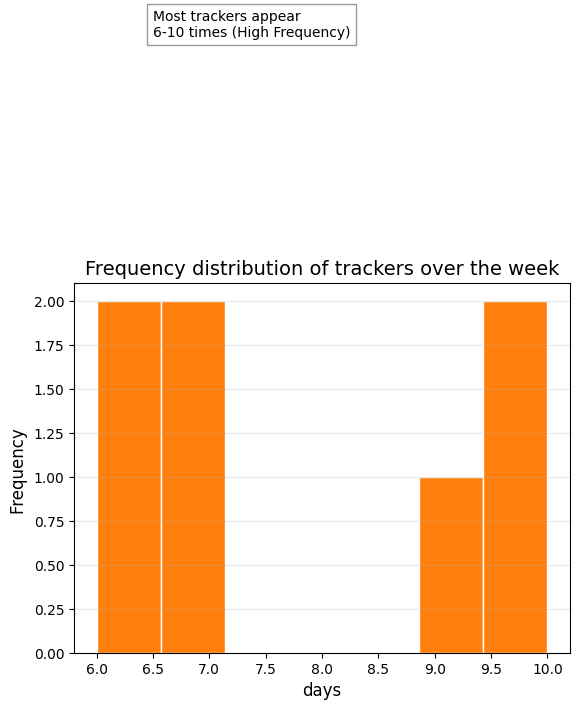

In [21]:
# 3. Histogram

plt.hist(df_trackers['Frequency'][0:7],bins=7, color='#ff7f0e', edgecolor='white', label='frequency of trackers' )

plt.title('Frequency distribution of trackers over the week', fontsize=14)
plt.xlabel('days', fontsize=12)
plt.ylabel('Frequency ', fontsize=12)

# Bin Justification in title or text
plt.text(6.5, 3.5, "Most trackers appear\n6-10 times (High Frequency)", fontsize=10, color='black', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.grid(axis='y', alpha=0.3)
plt.show()

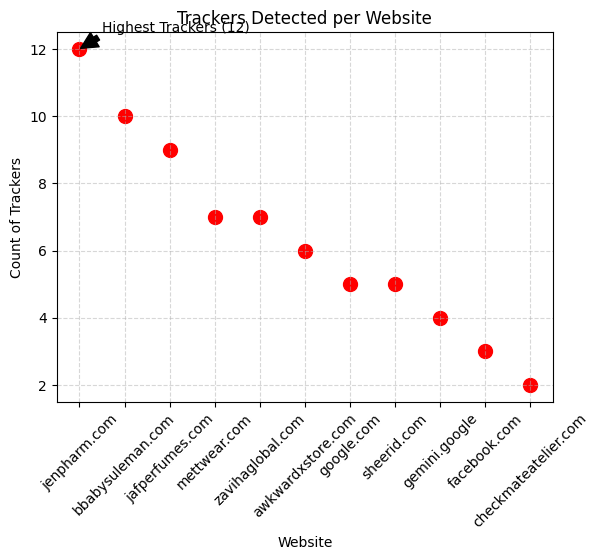

In [23]:
# Create the scatter plot
plt.scatter(df_websites['Website'], df_websites['Tracker_Requests'], color='red', s=100)

# Customization
plt.title('Trackers Detected per Website')
plt.xlabel('Website')
plt.ylabel('Count of Trackers')
plt.xticks(rotation=45) # Rotates x-axis labels to prevent overlapping
plt.grid(True, linestyle='--', alpha=0.5)

# Annotating the highest point (jenpharm.com)
plt.annotate('Highest Trackers (12)', 
             xy=(0, 12),              # Coordinates of the point (Index 0 is jenpharm.com, Value 12)
             xytext=(0.5, 12.5),      # Where the text sits
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

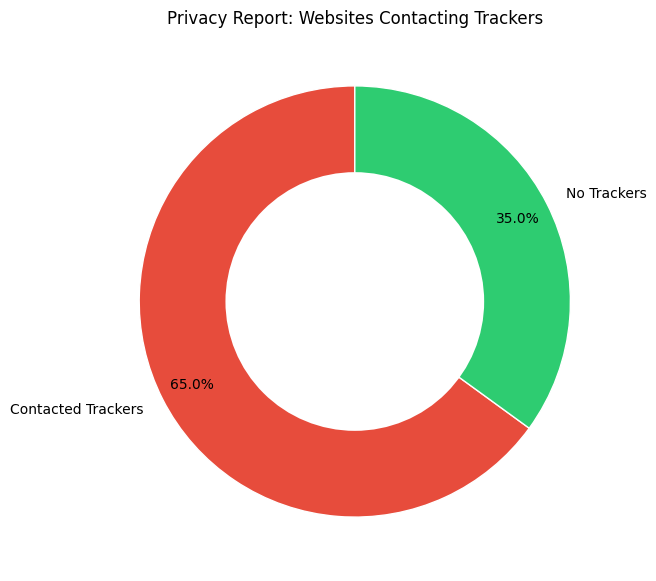

In [24]:

labels = ['Contacted Trackers', 'No Trackers']
sizes = [65, 35]
colors = ['#e74c3c', '#2ecc71'] # Red for trackers, Green for safe


plt.figure(figsize=(7, 7))


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, pctdistance=0.85, wedgeprops={'edgecolor': 'white'})

center_circle = plt.Circle((0, 0), 0.60, fc='white') # Draw a white circle in the center to turn it into a Donut
fig = plt.gcf()
fig.gca().add_artist(center_circle)


plt.title('Privacy Report: Websites Contacting Trackers')
plt.show()

**Reflection on Privacy Data**

In analyzing my privacy plots, the most clear pattern I observed is the consistent presence of major trackers like Google and Facebook across almost every site I visit. However, the most significant outlier in my data is jenpharm.com, which triggered the highest number of tracker requests. The real-life reason for this is that I have acne-prone skin, and I spend a lot of time and money on this specific brand because their products work for me. I frequently open the website to view new items or place regular orders, which explains the high activity spike.

A surprising insight from this data was realizing how directly my real-life physical struggles, like dealing with acne, shape my web browsing history and digital footprint. I had not considered that my necessity for skincare was exposing me to such aggressive commercial tracking. Based on this visualization, one realistic change I would like to make is to research and try out other skincare brands whose websites are safer and respect user privacy more. Finding effective products from a less invasive source would allow me to maintain my skincare routine without compromising my digital data.